In [160]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
try:
    import csiborgtools
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import csiborgtools
import utils
%load_ext autoreload
%autoreload 2

import joblib
from os.path import join

from scipy.interpolate import interp1d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
sim = 7636

csiborgtools.read.get_sim_path(sim)

'/mnt/extraspace/hdesmond/ramses_out_7636'

7636

In [2]:
cat = csiborgtools.read.CombinedHaloCatalogue()
# cat = csiborgtools.io.HaloCatalogue(7444, 951)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [03:06<00:00, 18.69s/it]


In [3]:
matcher = csiborgtools.match.RealisationsMatcher(cat)

In [4]:
n = 0
match = matcher.cross_knn_position_single(n, 10)
# x.shape

<IPython.core.display.Javascript object>


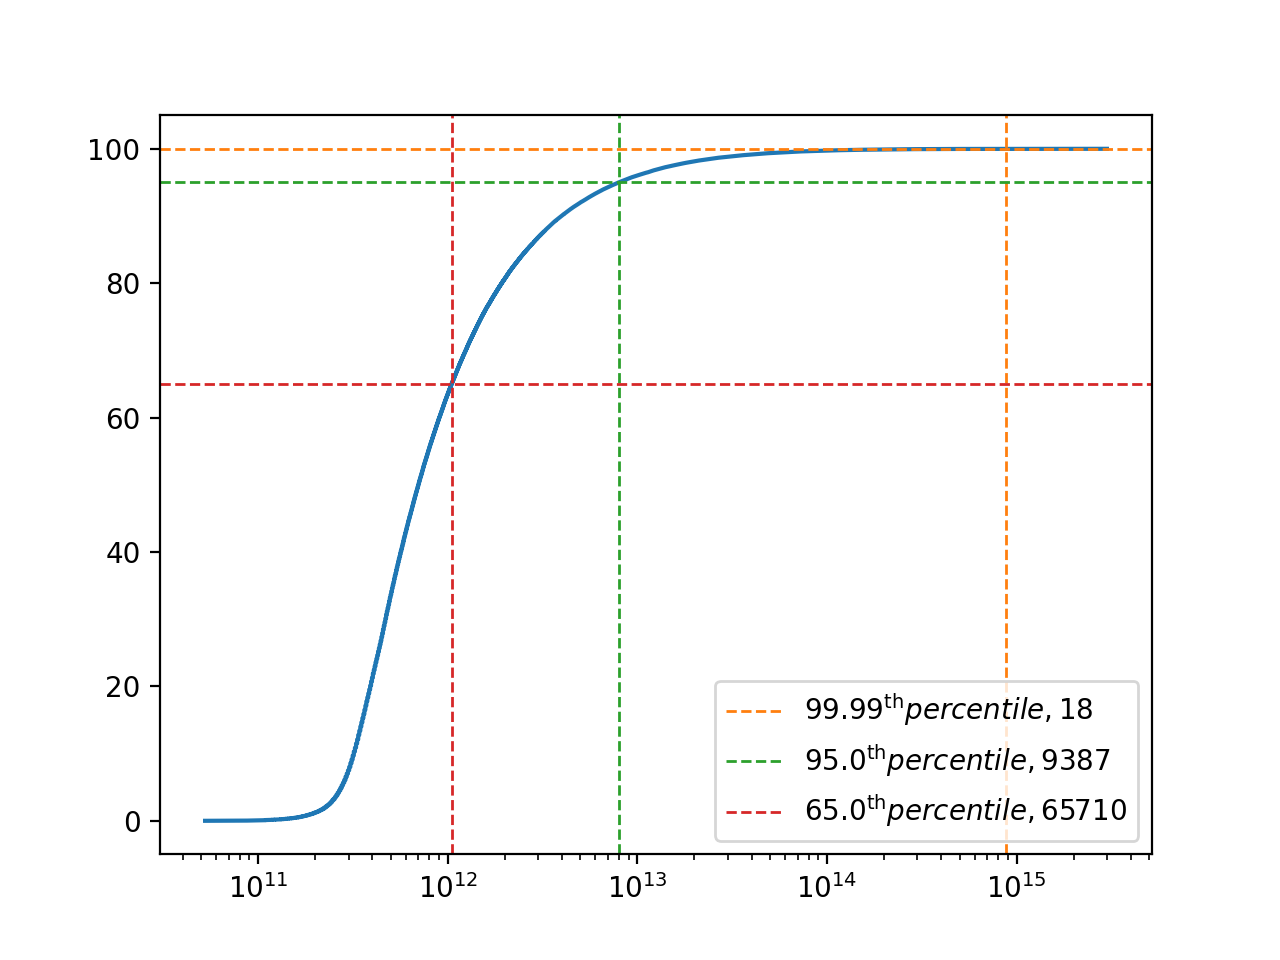

In [125]:
q = np.linspace(0, 100, 10000)
ps = np.percentile(cat[n]["m200"], q)
f = interp1d(q, np.log10(ps))

pcuts = [99.99, 95., 65.]


colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.figure()
plt.plot(ps, q)

for i, pcut in enumerate(pcuts):
    N = int((100 - pcut) / 100 * cat[n]["m200"].size)
    plt.axvline(10**float(f(pcut)), ls="--", c=colors[i + 1],
                label=r"${}^{{\rm th}} percentile, {}$".format(pcut, N), lw=1)
    plt.axhline(pcut, c=colors[i + 1], ls="--", lw=1)
plt.xscale("log")
plt.legend()
plt.show()

In [157]:
ids = np.where(cat[n]["m200"] > 10**f(pcuts[2]))[0]
ids = np.random.choice(ids, size=3)

<IPython.core.display.Javascript object>


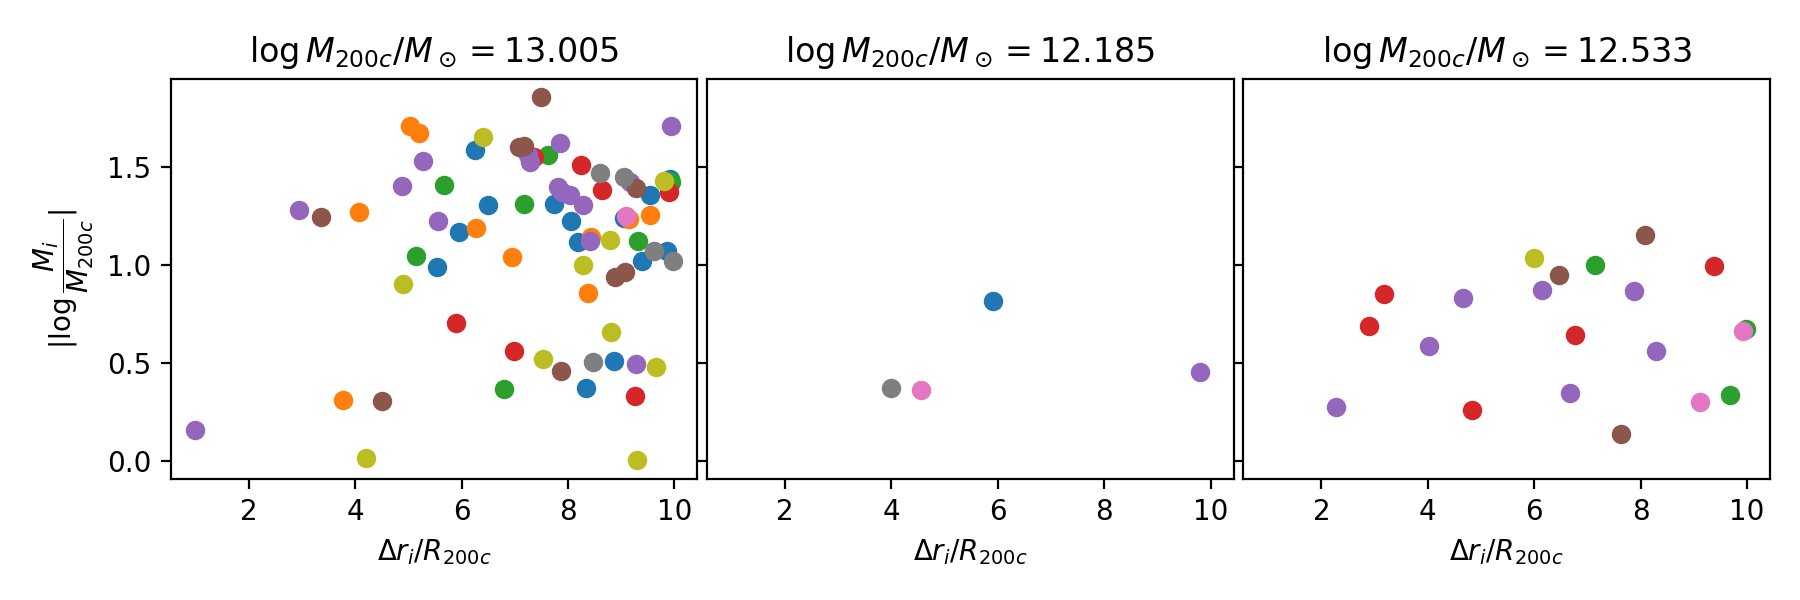

In [159]:
fig, axs = plt.subplots(ncols=3, figsize=(9, 3), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0)
for m, k in enumerate(ids):
    r200 = cat[n]["r200"][k]
    m200 = cat[n]["m200"][k]
    
    axs[m].set_title(r"$\log M_{{200c}} / M_\odot = {:.3f}$".format(np.log10(m200)))
    for i, j in enumerate(matcher.search_sim_indices(n)):
        indxs, dist = match[i]
        indxs = indxs[k]
        dist = dist[k]

        dlogmass = np.abs(np.log10(cat[j]["m200"][indxs] / m200))
        axs[m].scatter(dist / r200, dlogmass)
    
    
for i in range(3):
    axs[i].set_xlabel(r"$\Delta r_i / R_{200c}$")
axs[0].set_ylabel(r"$|\log \dfrac{M_i}{M_{200c}}|$")
plt.tight_layout(w_pad=0)
# plt.savefig("../plots/lowest_massive.png", dpi=450)
fig.show()

In [ ]:
plt.figure()
for k in range(cat.N-1):
    plt.scatter(x[k, :, 1], x[k, :, 2])

    
plt.xlabel(r"$\Delta r_i / R_{200c}$")
plt.ylabel(r"$|\log \dfrac{M_i}{M_{200c}}|$")
plt.savefig("../plots/example.png", dpi=450)
plt.show()

In [ ]:
x[:, 0, 2]

In [ ]:
cat.cross_knn_position(0, 0)

In [ ]:
x = cat.positions[6, :].reshape(-1, 3)


# x = np.asarray([0., 0., 0.]).reshape(-1, 3)

In [ ]:
cat.knn_position(x, 5)

In [ ]:
dist, knns = cat.knn_position([5, 9], 5)

In [ ]:
dist

In [ ]:
knns

In [ ]:
model = NearestNeighbors()

In [ ]:
model.fit(cat[0].positions)

In [ ]:
p = cat[0].positions[:2, :].reshape(-1, 3)

In [ ]:
p

In [ ]:
model.kneighbors(p, n_neighbors=2)

In [ ]:
cat = csiborgtools.io.HaloCatalogue(9844, 1016, minimum_m500=0)

In [ ]:
cat["dec"].size

In [ ]:
planck = csiborgtools.io.PlanckClusters("../data/HFI_PCCS_SZ-union_R2.08.fits")

In [ ]:
mcxc = csiborgtools.io.MCXCClusters("../data/mcxc.fits")

In [ ]:
planck.match_to_mcxc(mcxc)

In [ ]:
planck["MSZ"]

In [ ]:
planck.data.dtype.names

In [ ]:
csiborgtools.io.get_csiborg_ids("/mnt/extraspace/hdesmond")

In [ ]:
from astropy.cosmology import FlatLambdaCDM, z_at_value
from astropy import units

In [ ]:
Nsim = 9844
Nsnap = 1016
# data, box = utils.load_processed(Nsim, Nsnap)
data, box = utils.load_processed(Nsim, Nsnap)

In [ ]:
X = np.vstack([data["peak_{}".format(p)] for p in ("x", "y", "z")]).T

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neighbors = NearestNeighbors()

In [ ]:
neighbors.fit(X)

In [ ]:
p = X[0, :]

neighbors.kneighbors(p.reshape(-1,3))

In [ ]:
data["peak_y"]

In [ ]:
zcosmo = box.box2cosmoredshift(data["dist"])
z

In [ ]:
zpec = box.box2pecredshift(*[data[p] for p in ["vx", "vy", "vz", "peak_x", "peak_y", "peak_z"]])
zobs = box.box2obsredshift(*[data[p] for p in ["vx", "vy", "vz", "peak_x", "peak_y", "peak_z"]])

In [ ]:
m = zcosmo < 0.05

plt.figure()

# plt.scatter(zcosmo[m], zcosmo[m] - zobs[m], s=0.05)
plt.scatter(zcosmo[m], zpec[m], s=0.05, rasterized=True)
t = np.linspace(0, zcosmo[m].max())

plt.axhline(0, c="red", ls="--")

plt.xlabel(r"$z_{\rm cosmo}$")
plt.ylabel(r"$z_{\rm pec}$")
plt.tight_layout()
plt.savefig("../plots/redshift.png", dpi=450)
plt.show()

In [ ]:
data[""]

In [ ]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.05)

cosmo.comoving_distance()

x = 10000 * units.Mpc

z_at_value(cosmo.comoving_distance, x)

In [ ]:
from astropy import constants

In [ ]:
constants.c.value * 1e-8

In [ ]:
n_sims = csiborgtools.io.get_csiborg_ids("/mnt/extraspace/hdesmond")

In [ ]:
np.where(n_sims == 7660)

In [ ]:
for n_sim in n_sims:
    simpath = csiborgtools.io.get_sim_path(n_sim)
    maxsnap = csiborgtools.io.get_maximum_snapshot(simpath)
    box = csiborgtools.units.BoxUnits(maxsnap, simpath)
    print(maxsnap, box._aexp)

In [ ]:
simpath = csiborgtools.io.get_sim_path(7660)

In [ ]:
simpath

In [ ]:
box = csiborgtools.units.BoxUnits(999, simpath)

In [ ]:
box._aexp


In [ ]:
planck = utils.load_planck2015(200)
mcxc = utils.load_mcxc(200)

indxs = csiborgtools.io.match_planck_to_mcxc(planck, mcxc)

In [ ]:
groups = utils.load_2mpp_groups()

Nsim = 9844
Nsnap = 1016

data = utils.load_processed(Nsim, Nsnap)

In [ ]:
plt.figure()

m = data["m500"] > 1e13
plt.scatter(data["ra"][m], data["dec"][m], label="CSiBORG", s=3)
plt.scatter(groups["RA"], groups["DEC"], label="2M++ galaxy groups", s=3, marker="x")



plt.show()

In [ ]:
RAcoma = (12 +  59/60 + 48.7 / 60**2) * 15
DECcoma = 27 + 58 / 60 + 50 / 60**2


RAvirgo = (12 + 27 / 60) * 15
DECvirgo = 12 + 43/60



plt.figure()


plt.scatter(mcxc["RAdeg"], mcxc["DEdeg"], label="MCXC")
plt.scatter(planck["RA"], planck["DEC"], label="Plank",s=8, c="red")

plt.scatter(RAcoma, DECcoma, label="Coma", s=30, marker="x")
plt.scatter(RAvirgo, DECvirgo, label="Virgo", s=30, marker="x")

plt.legend(framealpha=0.5)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Clusters below 200 Mpc")
plt.savefig("../plots/clusters_radec.png", dpi=450)

plt.show()

In [ ]:
plt.figure()

plt.scatter(mcxc["COMDIST"], mcxc["M500"], label="MCXC")
# yerr = np.vstack([planck["MSZ"] - planck["MSZ_ERR_LOW"],
#                   planck["MSZ_ERR_UP"] - planck["MSZ"]])
yerr = np.vstack([planck["MSZ_ERR_LOW"], planck["MSZ_ERR_UP"]])
plt.errorbar(planck["COMDIST"], planck["MSZ"], yerr, label="Plank", fmt=" ", capsize=3, color="red")

plt.yscale("log")
plt.legend()
plt.title("Clusters below 200 Mpc")
plt.xlabel(r"$D_{\rm c} / \mathrm{Mpc}$")
plt.ylabel(r"$M_{\rm 500c} / M_\odot$")
# plt.savefig("../plots/clusters_mass_dist.png", dpi=450)

plt.show()

In [ ]:
d["RAdeg"]

In [ ]:
d.dtype.names

In [ ]:
d["Cat"]

In [ ]:
type(d["MCXC"])

In [ ]:
np.asanyarray(["aasdasdaasdasdasdad", "bsdfadadfasddsgasdg"]).dtype

In [ ]:
d["MCXC"]

In [ ]:
plt.figure()
# plt.scatter(d["RAdeg"], d["DEdeg"], s=1)
plt.scatter(d["z"], d["M500"], s=1)

plt.yscale("log")
plt.show()

In [ ]:
Nsim = 9844
Nsnap = 1016

data = utils.load_processed(Nsim, Nsnap)

In [ ]:
bins = np.arange(11.8, 15.4, 0.2)


plt.figure()
x, mu, std = csiborgtools.match.number_density(data, "m200", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{200c}$")

x, mu, std = csiborgtools.match.number_density(data, "m500", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{500c}$")

x, mu, std = csiborgtools.match.number_density(data, "totpartmass", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{\rm tot}$")

x, mu, std = csiborgtools.match.number_density(data, "mass_mmain", bins, 200, True)
plt.errorbar(x, mu, std, capsize=4, label=r"$M_{\rm mmain}$")

plt.legend()

plt.yscale("log")
plt.xscale("log")

plt.ylabel(r"$\phi / (\mathrm{Mpc}^{-3})~\mathrm{dex}$")
plt.xlabel(r"$M_{\rm x}$")
plt.tight_layout()
plt.savefig("../plots/HMF.png", dpi=450)
plt.show()

In [ ]:
nfw = csiborgtools.fits.NFWProfile()
m200_nfw = nfw.enclosed_mass(data["r200"], data["Rs"], data["rho0"])



plt.figure()

plt.scatter(data["m200"], m200_nfw, s=1)
t = np.linspace(1e11, 1e15)
plt.plot(t, t, c="red", ls="--", lw=1.5)
plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$M_{200c}$")
plt.ylabel(r"$M_{\mathrm{NFW}, 200c}$")
plt.tight_layout()
plt.savefig("../plots/enclosed_vs_nfw.png", dpi=450)
plt.show()

In [ ]:
logm200 = np.log10(data["m200"])
conc = data["conc"]

N = 10
bins = np.linspace(logm200.min(), logm200.max(), N)
x = [0.5*(bins[i] + bins[i + 1]) for i in range(N-1)]
y = np.full((N - 1, 3), np.nan)
for i in range(N - 1):
    mask = (logm200 >= bins[i]) & (logm200 < bins[i + 1]) & np.isfinite(conc)
    y[i, :] = np.percentile(conc[mask], [14, 50, 84])


    
    
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(6.4, 6.4 * 1))
fig.subplots_adjust(hspace=0)
axs[0].plot(x, y[:, 1], c="red", marker="o")
axs[0].fill_between(x, y[:, 0], y[:, 2], color="red", alpha=0.25)
axs[1].hist(logm200, bins="auto", log=True)

for b in bins:
    for i in range(2):
        axs[i].axvline(b, c="orange", lw=0.5)

axs[0].set_ylim(2, 10)
axs[1].set_xlabel(r"$M_{200c}$")
axs[0].set_ylabel(r"$c_{200c}$")
axs[1].set_ylabel(r"Counts")

plt.tight_layout(h_pad=0)
plt.savefig("../plots/mass_concentration.png", dpi=450)
plt.show()